In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
####Change direction####
dir_name = r"C:\Users\Oguz\Desktop\Bilkent\3.2\CS464\hw2\afhq_cat"

In [3]:
print("Please wait, it can take few minutes to run completely")
pics=[]
for i in os.listdir(dir_name):
    pics.append(Image.open(os.path.join(dir_name,i)).resize((64,64), Image.BILINEAR))

Please wait, it can take few minutes to run completely


In [4]:
imgs=[]
for j in pics:
    imgs.append(np.array(j,dtype=float).reshape(-1,3))

In [5]:
X=np.array(imgs)

In [6]:
X_0=X[:,:,0]
X_1=X[:,:,1]
X_2=X[:,:,2]

# Question 1.1

In [7]:
def pca(matrix):
    matrix_mean=matrix-np.mean(matrix,axis=0)
    cov=np.cov(matrix_mean, rowvar = False)
    value, vector = np.linalg.eig(cov)
    sort_index = np.argsort(value)[::-1]
    sort_eigenval = value[sort_index]
    sort_eigenvec = vector[:,sort_index]
    return sort_eigenval, sort_eigenvec

In [8]:
val_0,vec_0=pca(X_0)
val_1,vec_1=pca(X_1)
val_2,vec_2=pca(X_2)

In [9]:
def pve(sort_val):
    n=len(sort_val)
    pve = sort_val*100/np.sum(sort_val)
    pve_sum=pve.dot(np.triu(np.ones((n,n))))
    return pve, pve_sum

In [10]:
pve_R,pve_sum_R=pve(val_0)
pve_G,pve_sum_G=pve(val_1)
pve_B,pve_sum_B=pve(val_2)

In [12]:
pve_table=pd.DataFrame(np.array([pve_R,pve_sum_R,pve_G,pve_sum_G,pve_B,pve_sum_B]).T,index=np.arange(1,len(pve_G)+1),columns=["PVE Red","PVE Red Sums","PVE Green","PVE Green Sums","Pve Blue","PVE Blue Sums"])
pve_table[:10]
#print(pve_table[:10])

,PVE Red,PVE Red Sums,PVE Green,PVE Green Sums,Pve Blue,PVE Blue Sums
1,23.505564,23.505564,20.873070,20.873070,22.855928,22.855928
2,15.650303,39.155868,15.883864,36.756934,15.647814,38.503742
3,9.004832,48.160699,9.258536,46.015470,8.789480,47.293222
4,6.829707,54.990407,6.810819,52.826288,6.202809,53.496032
5,3.752532,58.742939,3.798398,56.624686,3.739740,57.235772
6,2.394648,61.137587,2.446589,59.071275,2.416357,59.652129
7,2.276349,63.413935,2.427818,61.499094,2.404514,62.056643
8,2.112766,65.526702,2.148947,63.648041,2.059390,64.116034
9,1.793531,67.320232,1.886943,65.534983,1.845760,65.961794
10,1.349271,68.669503,1.421092,66.956076,1.428438,67.390232


<ipython-input-13-7134e9713e9e>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


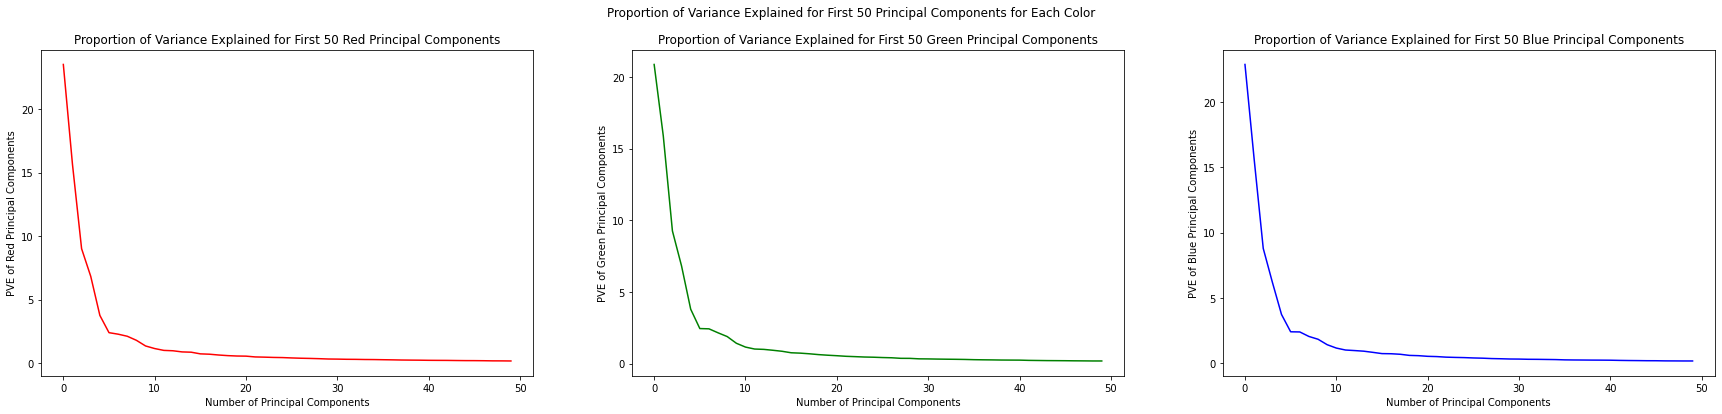

In [13]:
fig,ax=plt.subplots(1,3,figsize=(30,6))

ax[0].plot(pve_R[:50],"r")
ax[0].set_ylabel("PVE of Red Principal Components")
ax[0].set_xlabel("Number of Principal Components")
ax[0].set_title("Proportion of Variance Explained for First 50 Red Principal Components")

ax[1].plot(pve_G[:50],"g")
ax[1].set_ylabel("PVE of Green Principal Components")
ax[1].set_xlabel("Number of Principal Components")
ax[1].set_title("Proportion of Variance Explained for First 50 Green Principal Components")

ax[2].plot(pve_B[:50],"b")
ax[2].set_ylabel("PVE of Blue Principal Components")
ax[2].set_xlabel("Number of Principal Components")
ax[2].set_title("Proportion of Variance Explained for First 50 Blue Principal Components")

fig.suptitle("Proportion of Variance Explained for First 50 Principal Components for Each Color")
fig.show()

In [14]:
def threshold(th,pve):
    th_mat=np.argwhere(pve>th)
    return (th_mat[0][0]+1, pve[th_mat[0][0]])

In [15]:
th_R=threshold(70,pve_sum_R)
th_G=threshold(70,pve_sum_G)
th_B=threshold(70,pve_sum_B)

In [16]:
print("While the sum of first {} principal component PVE is {:.3f}%, \
sum of first {} principal component PVE is {:.3f}% for red color.".format(th_R[0]-1,pve_sum_R[th_R[0]-2],th_R[0],th_R[1]))

print("While the sum of first {} principal component PVE is {:.3f}%, \
sum of first {} principal component PVE is {:.3f}% for green color. ".format(th_G[0]-1,pve_sum_G[th_G[0]-2],th_G[0],th_G[1]))

print("While the sum of first {} principal component PVE is {:.3f}%, \
sum of first {} principal component PVE is {:.3f}% for blue color.".format(th_B[0]-1,pve_sum_B[th_B[0]-2],th_B[0],th_B[1]))

While the sum of first 11 principal component PVE is 69.815%, sum of first 12 principal component PVE is 70.815% for red color.
While the sum of first 12 principal component PVE is 69.128%, sum of first 13 principal component PVE is 70.122% for green color. 
While the sum of first 12 principal component PVE is 69.584%, sum of first 13 principal component PVE is 70.565% for blue color.


<ipython-input-17-b63782149962>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


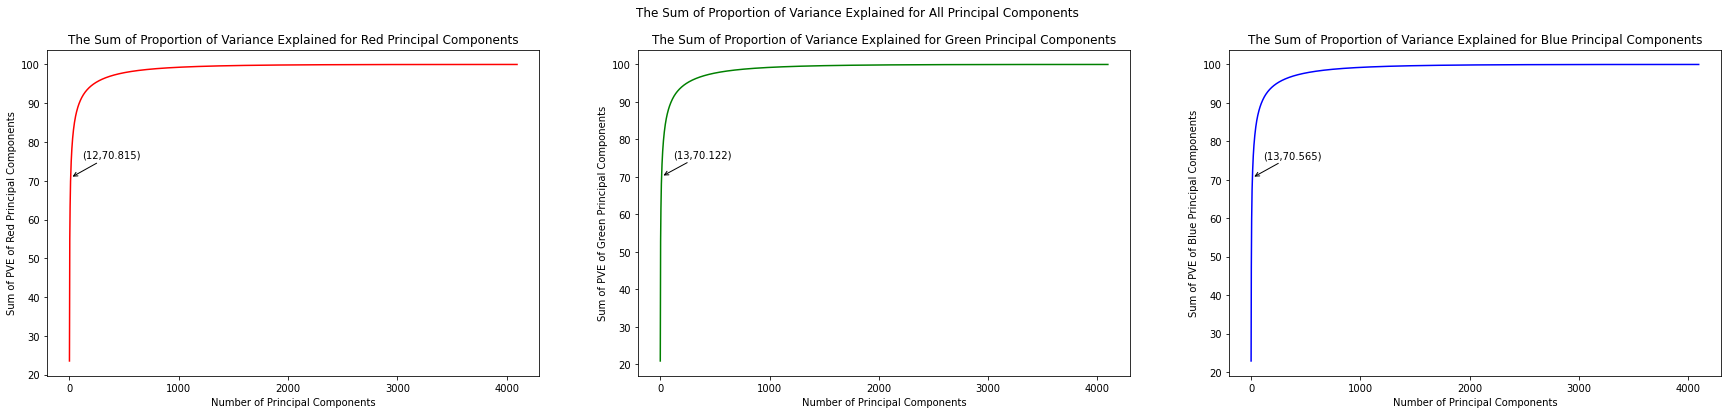

In [17]:
fig,ax=plt.subplots(1,3,figsize=(30,6))

ax[0].plot(pve_sum_R,"r")
ax[0].annotate("({},{:.3f})".format(th_R[0],th_R[1]),th_R, xytext=(th_R[0]+100,th_R[1]+5),arrowprops=dict(arrowstyle="->") )
ax[0].set_ylabel("Sum of PVE of Red Principal Components")
ax[0].set_xlabel("Number of Principal Components")
ax[0].set_title("The Sum of Proportion of Variance Explained for Red Principal Components")

ax[1].plot(pve_sum_G,"g")
ax[1].annotate("({},{:.3f})".format(th_G[0],th_G[1]),th_G, xytext=(th_G[0]+100,th_G[1]+5),arrowprops=dict(arrowstyle="->") )
ax[1].set_ylabel("Sum of PVE of Green Principal Components")
ax[1].set_xlabel("Number of Principal Components")
ax[1].set_title("The Sum of Proportion of Variance Explained for Green Principal Components")

ax[2].plot(pve_sum_B,"b")
ax[2].annotate("({},{:.3f})".format(th_B[0],th_B[1]),th_B, xytext=(th_B[0]+100,th_B[1]+5),arrowprops=dict(arrowstyle="->") )
ax[2].set_ylabel("Sum of PVE of Blue Principal Components")
ax[2].set_xlabel("Number of Principal Components")
ax[2].set_title("The Sum of Proportion of Variance Explained for Blue Principal Components")

fig.suptitle("The Sum of Proportion of Variance Explained for All Principal Components")
fig.show()

# Question 1.2

In [18]:
normalization = lambda x:(x-x.min()) / (x.max()-x.min())

In [19]:
def first_10(mat):
    _10_pca=mat[:,:10]
    reshaped_10_pca=np.transpose(_10_pca, axes= (1,0)).reshape(10,64, 64)
    return reshaped_10_pca

In [20]:
reshaped_R=normalization(first_10(vec_0))
reshaped_G=normalization(first_10(vec_1))
reshaped_B=normalization(first_10(vec_2))

In [21]:
ten_img=np.array([reshaped_R,reshaped_G,reshaped_B])
ten_img=np.transpose(ten_img,axes=(1,2,3,0))

Text(0.5, 0.98, 'RGB Images of First 10 Eigenvectors')

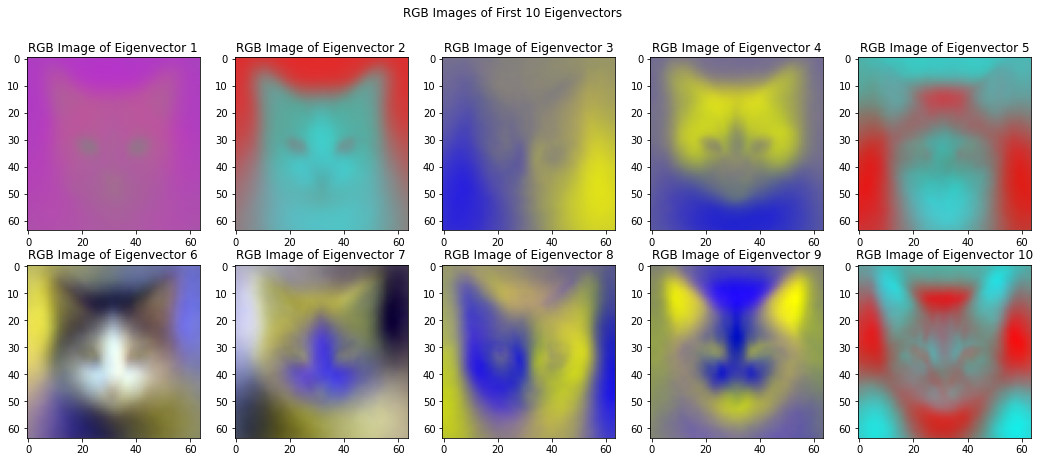

In [22]:
row = 2
col = 5
plt.figure(figsize=(18,7))
for q in range(10):
    plt.subplot(row,col,q+1)
    plt.imshow(ten_img[q])
    plt.title("RGB Image of Eigenvector {}".format(q+1))
plt.suptitle("RGB Images of First 10 Eigenvectors")

# Question 1.3

In [23]:
def reconstruct(data, eigvec):
    mean=np.mean(data,axis=0)
    data=data-mean
    project = np.matmul(data,eigvec.dot(eigvec.T)) + mean
    return project

In [24]:
k_list= [1, 50, 250, 500, 1000, 4096]

In [25]:
sec_img=Image.open(os.path.join(dir_name,"flickr_cat_000003.jpg")).resize((64,64), Image.BILINEAR)
sec_img=np.array(sec_img,dtype=np.float32).reshape(-1,3)

In [26]:
R_list=[]
G_list=[]
B_list=[]
for k in k_list:
    R_list.append(reconstruct(sec_img[:,0], vec_0[:,:k]))
    G_list.append(reconstruct(sec_img[:,1], vec_1[:,:k]))
    B_list.append(reconstruct(sec_img[:,2], vec_2[:,:k]))

In [27]:
rec=np.array([R_list,G_list,B_list])
rec=np.transpose(rec,axes=(1,2,0)).reshape(6,64,64,3)

Text(0.5, 0.98, 'Reconstruction for Different First Principal Components Sizes')

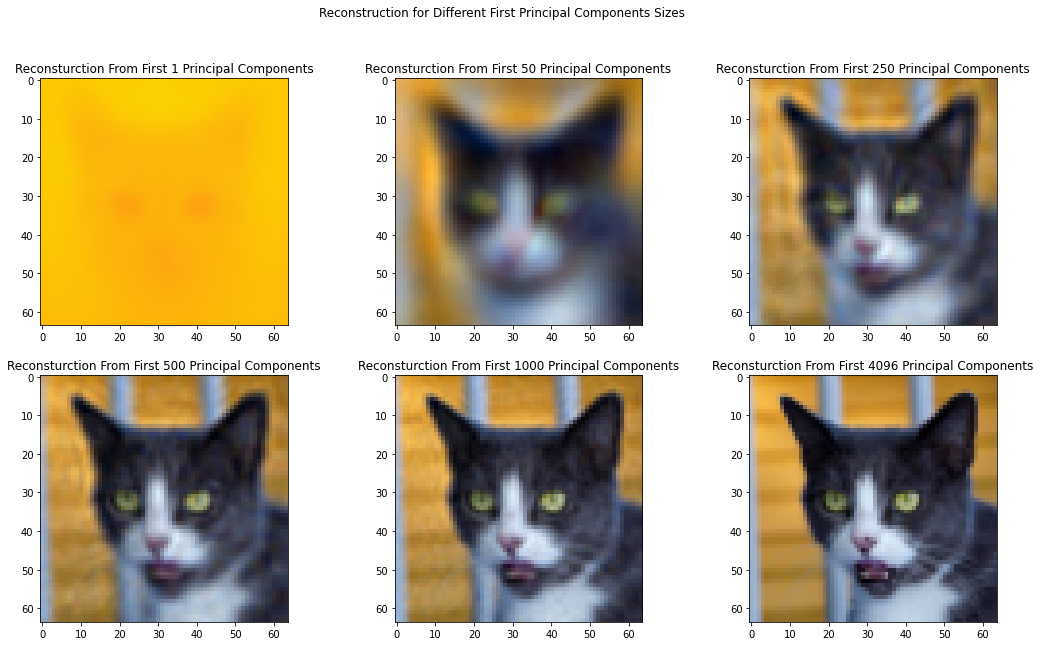

In [28]:
plt.figure(figsize=(18,10))
for l in range(6):
    plt.subplot(2,3,l+1)
    plt.imshow(normalization(rec[l]).reshape(64,64,3))
    plt.title("Reconsturction From First {} Principal Components".format(k_list[l]))
plt.suptitle("Reconstruction for Different First Principal Components Sizes")

In [29]:
errors=[]
for i in range(len(k_list)):
    errors.append(np.square(sec_img.reshape(64,64,3)-rec[i]).sum()/(64*64*3))

Text(0.5, 1.0, 'MSE of Wanted First Principal Components')

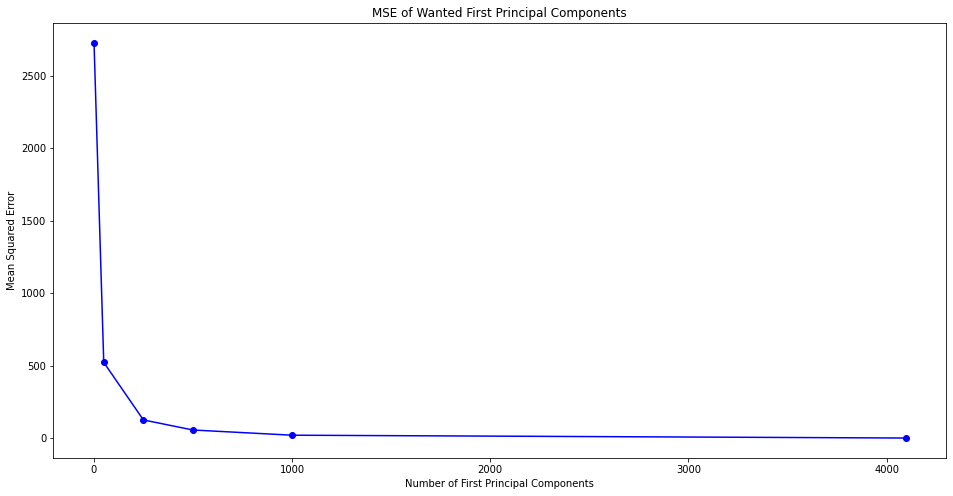

In [30]:
plt.figure(figsize=(16,8))
plt.plot(k_list,errors,"bo-")
plt.xlabel("Number of First Principal Components")
plt.ylabel("Mean Squared Error")
plt.title("MSE of Wanted First Principal Components")

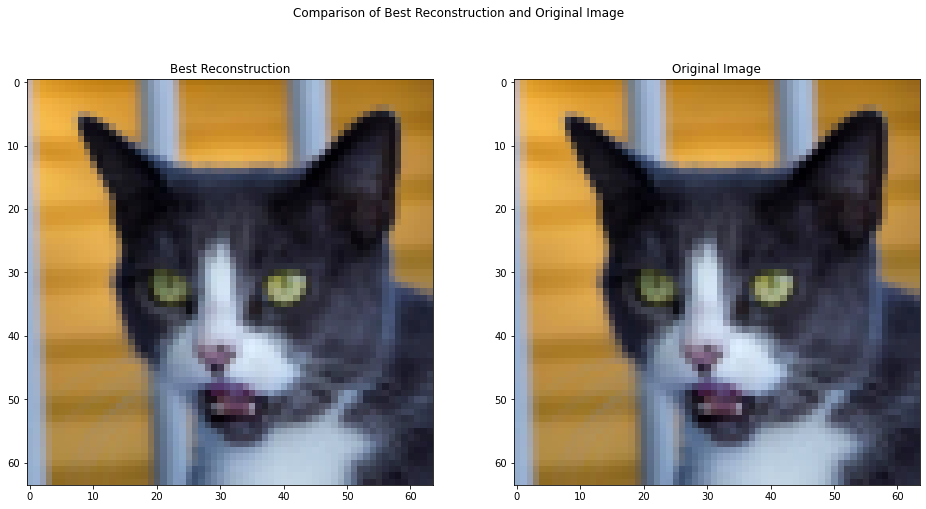

In [31]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(normalization(rec[5]).reshape(64,64,3))
plt.title("Best Reconstruction")
plt.subplot(1,2,2)
plt.imshow((normalization(sec_img).reshape(64,64,3)))
plt.title("Original Image")
plt.suptitle("Comparison of Best Reconstruction and Original Image")
plt.show()